In [24]:
# importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import null_space

In [25]:
# function to run the RK algorithm and computing scalar product of quantity (a) across iterations
def RK_scalar_product(A, b, x_ref):
    " this function takes as inputs a matrix A, vector b, and a point x_ref and returns the scalar product"
    " <x-x_ref,v_j> across iterations and runs"

    # generating probabilities of choosing the rows
    frob_norm_A = np.linalg.norm(A, ord='fro')
    probas = (np.linalg.norm(A, axis=1)/frob_norm_A)**2

    
    scalar_product = [[[] for i in range(int(n_run))] for k in range(len(indices))]
           
    for run in range(int(n_run)):

        x = x_0
        
        p = 0
        for k in indices:
            scalar_product[p][run].append(np.dot(x - x_ref, Vt[k,:]))
            p += 1

        for i in range(int(n_iter)):
            row_idx = int(np.random.choice(A.shape[0], 1, p=probas))  # to select rows with specified probability
            if np.linalg.norm(A[row_idx,:])==0: # avoid zero rows
                continue
            else:
                x = x + (b[row_idx] - np.dot(A[row_idx,:],x))/((np.linalg.norm(A[row_idx,:], ord=2))**2)*A[row_idx,:]
                d = 0
                for k in indices:
                    scalar_product[d][run].append(np.dot(x - x_ref, Vt[k,:]))
                    d += 1    
                
        print("end run", run)

    return(scalar_product)

In [26]:
# Generate noisy data
m = 1000
n = 200
r = 100
noisy_A = np.random.randn(m,r) @ np.random.randn(r,n)
noisy_b = np.random.randn(m,)

In [27]:
# Computing SVD of noisy_A
U, s, Vt = np.linalg.svd(noisy_A, full_matrices=True)

In [28]:
# select random indices of right singular vectors
indices = random.sample(range(0, r), 5)
indices.append(r-1)  # include index of the smallest right singular vector
indices

[57, 59, 60, 33, 78, 99]

In [29]:
# reference point
x_star = 10*np.random.randn(n,)  
# x_star = np.linalg.pinv(noisy_A)@noisy_b

In [30]:
# starting point
x_0 = 20*np.random.randn(n,)

In [31]:
# projection of x_0 on the null space of noisy_A
null_spaceNoisyA = null_space(noisy_A)
orthogonal_basis = null_spaceNoisyA
dot_product_values = (x_0.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x0_n =  np.sum( mult_basis , axis=1)
x0_r = x_0 - x0_n


# projection of x_star on the row space of noisy_A
dot_product_values = (x_star.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x_star_n =  np.sum( mult_basis , axis=1)
x_star_r = x_star - x_star_n

In [32]:
# Running the RK algorithm

n_iter = 20000   # number of iterations
n_run = 20        # number of runs of the algorithm

scalar_product = RK_scalar_product(noisy_A, noisy_b, x0_n+x_star_r)

end run 0
end run 1
end run 2
end run 3
end run 4
end run 5
end run 6
end run 7
end run 8
end run 9
end run 10
end run 11
end run 12
end run 13
end run 14
end run 15
end run 16
end run 17
end run 18
end run 19


In [33]:
# Computing the mean and standard deviation of the scalar product across the runs
mean_scalar_product = []
std_scalar_product = []
for i in range(len(indices)):
    mean_scalar_product.append(np.mean(np.array(scalar_product[i]), axis = 0))
    std_scalar_product.append(np.std(np.array(scalar_product[i]), axis = 0))

In [34]:
# computing quantity (b) and (c)
b = [[] for n in range(len(indices))]
c = [[] for n in range(len(indices))]
q = 0
for j in indices:
    alpha = (1-(s[j]/np.linalg.norm(noisy_A, ord='fro'))**2)
    for k in range(n_iter):
        b[q].append((alpha**k)*(np.dot(x0_r-x_star_r,Vt[j,:])))
        c[q].append((1-alpha**k)*np.dot(noisy_A@x_star-noisy_b,U[:,j])/s[j])
    q += 1

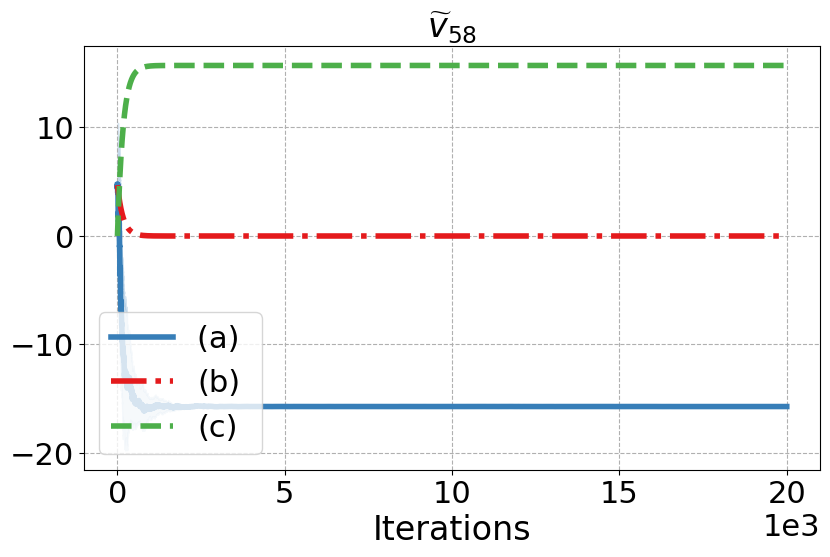

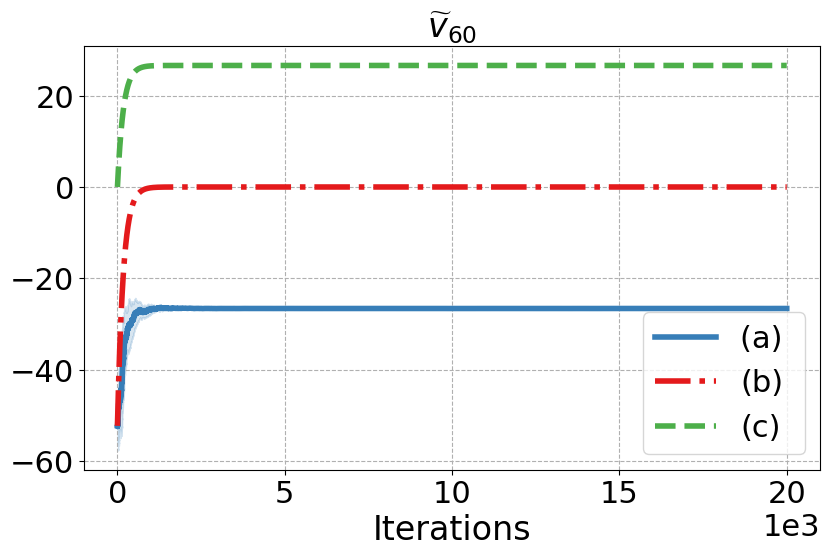

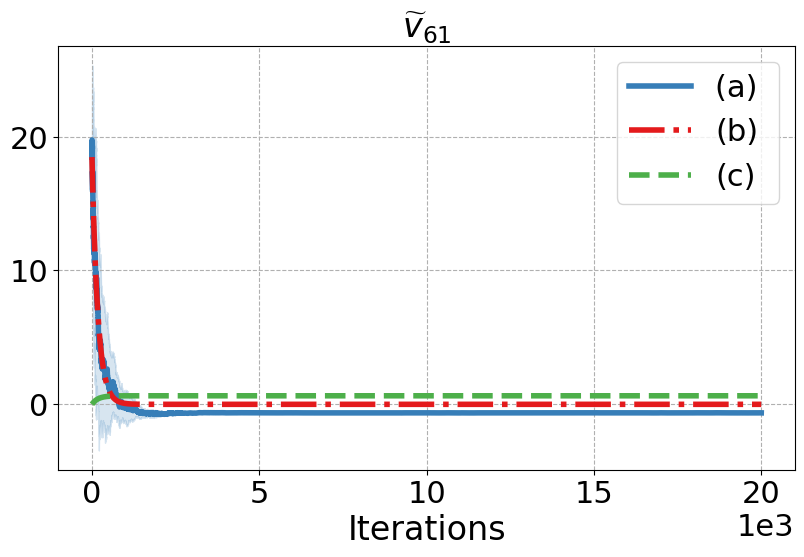

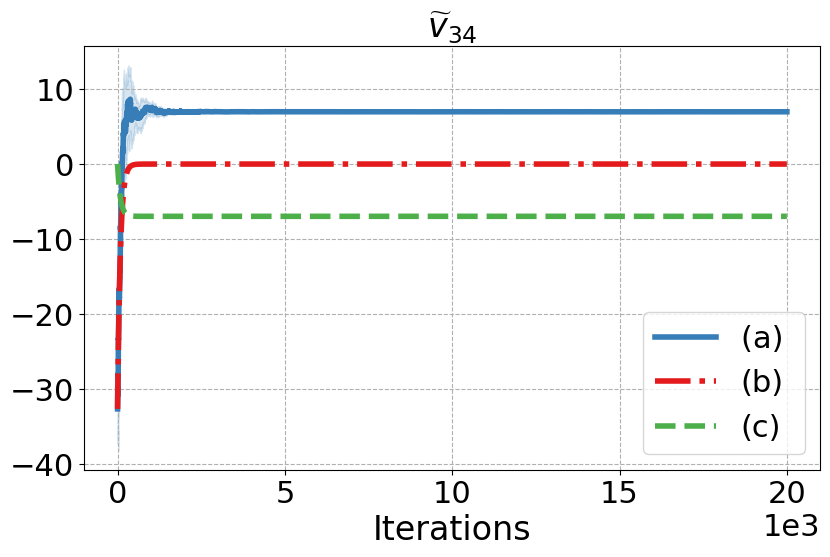

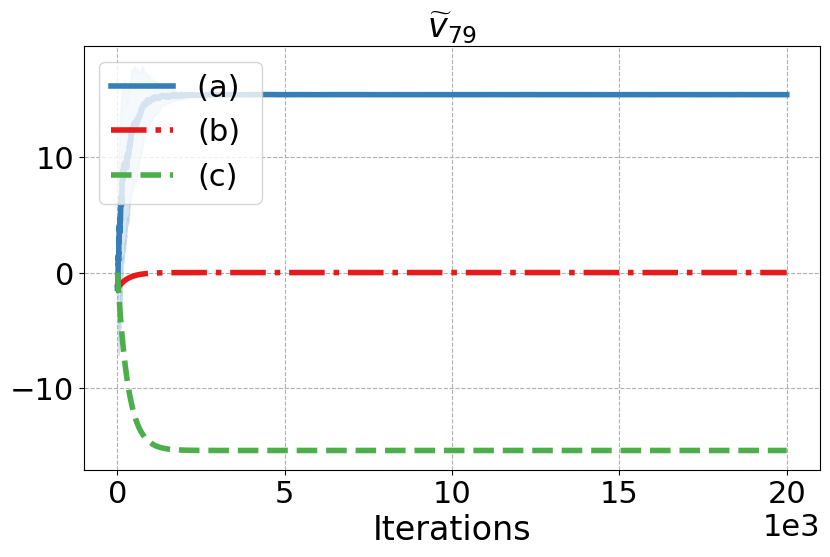

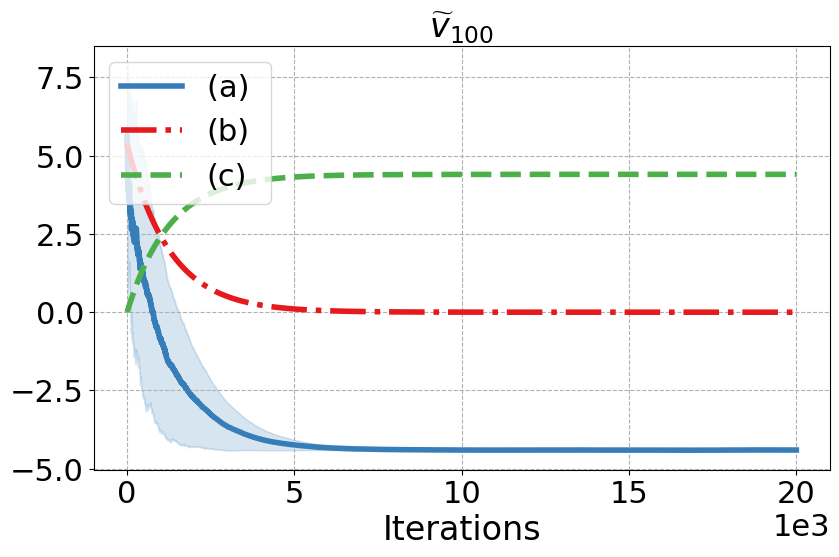

In [35]:
# Plotting the results

count = 0
for v in indices:
    plt.figure(figsize=(9.5, 5.5))

    plt.plot(mean_scalar_product[count], label="(a) ", color='#377eb8', linewidth=4)
    plt.fill_between(range(len(mean_scalar_product[count])), mean_scalar_product[count]-std_scalar_product[count], mean_scalar_product[count]+std_scalar_product[count], alpha=0.2, color='#377eb8')
    plt.plot(b[count], label='(b)', color='#e41a1c', linestyle='dashdot', linewidth=4)
    plt.plot(c[count], label='(c)', color='#4daf4a', linestyle='dashed', linewidth=4)

    plt.xlabel("Iterations",fontsize = 24)
    plt.rcParams['xtick.labelsize']=22
    plt.rcParams['ytick.labelsize']=22
    plt.legend(fontsize=22)
    plt.title(r'$\widetilde{v}_{%d}$'%(v+1), fontsize = 24)
    plt.grid(linestyle = '--')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
    
    count += 1